# Hello world

This Hello world example creates a simple quantum program and runs it on a quantum system. Begin with following the [Install and set up](install) instructions if you haven't already, including the steps to [Set up to use IBM Quantum Platform](setup-channel#set-up-to-use-ibm-quantum-platform).

We recommend that you use the [Jupyter](https://jupyter.org/install) development environment to interact with quantum computers. Be sure to install the recommended extra visualization support (`pip install qiskit[visualization]`), and note that zsh users need to put `'qiskit[visualization]'` in single quotes.

To learn about quantum computing in general, check out the [Basics of quantum information course](https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information) in IBM Quantum Learning.

The four steps to writing a quantum program are

1.  Map the problem to a quantum-native format

2.  Optimize the circuits and operators

3.  Execute using a quantum primitive function

4.  Analyze the results

## Step 1. Map the problem to a quantum-native format


In a quantum program, *quantum circuits* are the native format in which to represent quantum instructions, and *operators* represent the observables to be measured. When creating a circuit, you'll usually create a new `QuantumCircuit` object, then add instructions to it in sequence.


The following code cell creates a circuit that produces a *Bell state,* which is a specific two-qubit entangled state.

<Admonition type="note" title="Note: bit ordering">
  Qiskit uses the LSb 0 bit numbering where the $n^{th}$ digit has value $1 \ll n$ or $2^n$. Because we usually write numbers on paper with the most significant digits to the left and the least significant digits to the right (in the Hindu-Arabic system used in most of the world), this has the consequence that the bits are labeled with indices increasing <b>from right to left</b>. This LSb 0 convention makes mathematics easier and is the most commonly used for modern digital electronics, although the opposite convention MSb 0 is also found in some domains. Converting the $i^{th}$ index between LSb 0 and MSb 0 conventions on an $n$-bit register is as simple as $i \rightarrow n-i-1$. This differs across authors and software packages, so be aware!
</Admonition>


/home/mark/anaconda3/envs/Qiskit/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


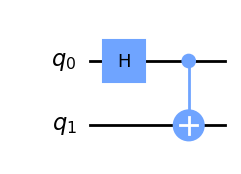

In [1]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

`.h(0)`: This applies the Hadamard gate to the qubit at index 0 in your quantum circuit. The Hadamard gate is denoted as 'H' and is crucial in creating superposition states in quantum computing. When applied to a qubit, the Hadamard gate transforms the basis states |0⟩ and |1⟩ into equal superpositions of both, i.e., |+⟩ and |−⟩, respectively.

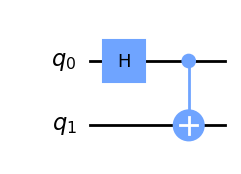

In [2]:
qc.draw("mpl", style="clifford")

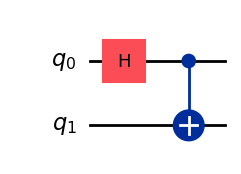

In [3]:
qc.draw("mpl", style="iqp")

See [`QuantumCircuit`](/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit) in the documentation for all available operations.


The following code cell uses the `quantum_info` package to create the two-qubit Pauli operator Z on qubit 1 and Z on qubit 2. If the state is entangled, then the correlation between qubit 1 and qubit 2 is one.


In [4]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

This code is a representation of various Pauli operators in quantum computing. Each of these operators is a tensor product of Pauli matrices. Here's a brief explanation of each:

ZZ = Pauli('ZZ'): This represents the tensor product of two Pauli Z matrices. In quantum mechanics, the Pauli Z matrix corresponds to a quantum gate that flips the phase of the state |1⟩ but leaves the state |0⟩ unchanged. The ZZ operator affects two qubits, applying a Z operation on each.

ZI = Pauli('ZI'): This is a tensor product of a Pauli Z matrix and an Identity matrix. It applies a Z operation to the first qubit and does nothing (identity operation) to the second qubit.

IZ = Pauli('IZ'): This is the opposite of ZI. It applies the identity operation to the first qubit and a Z operation to the second qubit.

XX = Pauli('XX'): This represents the tensor product of two Pauli X matrices. The Pauli X matrix is equivalent to a NOT gate in classical computing; it flips the state |0⟩ to |1⟩ and vice versa. The XX operator applies an X operation to both qubits.

XI = Pauli('XI'): This is a tensor product of a Pauli X matrix and an Identity matrix. It applies an X operation to the first qubit and does nothing to the second qubit.

IX = Pauli('IX'): This is the opposite of XI. It applies the identity operation to the first qubit and an X operation to the second qubit.

These operators are fundamental in various quantum computing algorithms and processes, especially in quantum error correction, quantum entanglement, and quantum simulations. They are used to describe the interactions between qubits and to manipulate quantum states in different ways.

## Step 2. Optimize the circuits and operators

For this example, the circuit the operators are simple, so no optimizations are needed.


## Step 3. Execute using a quantum primitive function

Quantum computers can produce random results, so you'll often want to collect a sample of the outputs by running the circuit many times. You can estimate the value of the observable using the `Estimator` class. `Estimator` is one of our two [primitives](../run/primitives-get-started); the other is `Sampler`, which can be used to get data from a quantum computer.


In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

service = QiskitRuntimeService()

# Run on the least-busy backend you have access to
# backend = service.least_busy(simulator=False, operational=True)
backend = service.get_backend("ibmq_qasm_simulator")

options = Options()
options.resilience_level = 1
options.optimization_level = 3

# Create an Estimator object
estimator = Estimator(backend, options=options)

# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)

# Once the job is complete, get the result
job.result()

EstimatorResult(values=array([-0.02196486,  0.01677316, -0.00439297, -0.03474441,  1.        ,
        1.        ]), metadata=[{'variance': 0.999517545090794, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.9997186610050118, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.9999807018036317, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.9987928260470149, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.0, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.0, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])

### Explanation

This code demonstrates how to use the Estimator module from the qiskit_ibm_runtime package, which is part of IBM's Qiskit framework for quantum computing. This module is designed to estimate expectation values of observables for given quantum circuits. 

backend = service.get_backend("ibmq_qasm_simulator")

options = Options()  
options.resilience_level = 1  
options.optimization_level = 3  

Here, we're creating an Options object to configure the execution environment. You set the resilience level and optimization level, which control error mitigation and circuit optimization, respectively.

estimator = Estimator(backend, options=options)  
An Estimator object is created with the specified backend and options. This object will be used to estimate expectation values.

job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)

This line submits the job to the Estimator. The circuits parameter is a list of quantum circuits to run, in this case, six instances of the circuit qc. The observables parameter is a list of Pauli observables (IZ, IX, ZI, XI, ZZ, XX) for which you want to estimate expectation values. The shots parameter specifies the number of repetitions for each circuit measurement.

job.result()

Finally, this line retrieves the result of the estimation once the job is complete.

Your code is an example of how to use quantum computing resources to estimate the expectation values of certain observables in a quantum circuit. This type of computation is useful in various quantum algorithms, including those used for quantum chemistry and quantum optimization.

<Admonition type="note" title="Queue times">
  Queue times on real devices may vary. If you would like to get a faster result, replace the `backend =` line with the following instead:

  ```python



  # Run on a simulator



  backend = service.get_backend("ibmq_qasm_simulator")



  ```
</Admonition>


The `values` property is a list of expectation values for each of the observables we provided.


## Step 4. Analyze the results


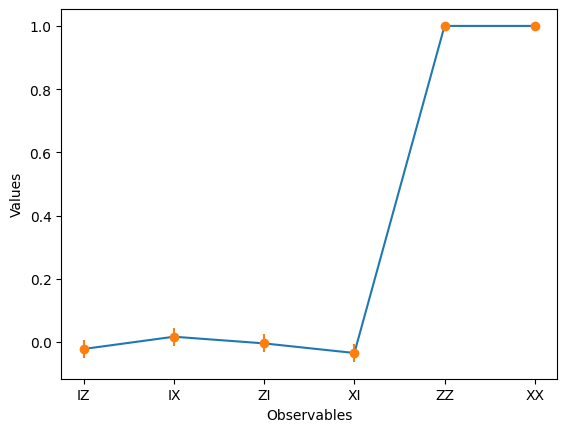

In [6]:
import matplotlib.pyplot as plt
import numpy as np
 
# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values
 
# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))
 
# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

Here we see that for qubits 0 and 1, the independent values of both X and Z are zero, while the correlations are one. This is a hallmark of quantum entanglement.


### Explanation

data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']  
values = job.result().values

`data` is a list of strings representing the observables for which you've estimated expectation values.  
`values` fetches the estimated expectation values from the job's result.

error = []  
for case in job.result().metadata:  
&nbsp;&nbsp;&nbsp;&nbsp;error.append(2*np.sqrt(case['variance']/case['shots']))

This loop calculates the error bars for each observable. The error is calculated as twice the standard error of the mean (2 * SEM), where SEM is the square root of the variance divided by the number of shots. This formula assumes a normal distribution of the measurement results.

plt.plot(data, values)  
plt.errorbar(data, values, yerr = error, fmt ='o')  
plt.xlabel('Observables')  
plt.ylabel('Values')  
plt.show()

plt.plot(data, values): Plots the expectation values against the observables.  
plt.errorbar(...): Adds error bars to the plot. yerr=error specifies the vertical error bars, and fmt='o' sets the format of the plot points.  
plt.xlabel('Observables') and plt.ylabel('Values'): Label the x-axis and y-axis.  
plt.show(): Displays the plot.

This script is useful for visualizing the results of quantum computations, especially in experiments involving measurements of different quantum states or in variational quantum algorithms where you need to track the convergence of expectation values. The inclusion of error bars provides important information about the reliability and precision of the measurements.